## 3.15 Homework week 3 "Classification"

### Dataset
In this homework, we will continue the New York City Airbnb Open Data. You can take it from Kaggle or download from here if you don't want to sign up to Kaggle.

We'll keep working with the 'price' variable, and we'll transform it to a classification task.

### Features
For the rest of the homework, you'll need to use the features from the previous homework with additional two 'neighbourhood_group' and 'room_type'. So the whole feature set will be set as follows:

'neighbourhood_group',
'room_type',
'latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365'
Select only them and fill in the missing values with 0.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [435]:
df=pd.read_csv('AB_NYC_2019.CSV')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [436]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [437]:
df.reviews_per_month=df.reviews_per_month.fillna(0)

In [438]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Question 1
What is the most frequent observation (mode) for the column 'neighbourhood_group'?

### Split the data
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value ('price') is not in your dataframe.

In [439]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

## Question 2
- Create the correlation matrix for the numerical features of your train dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?

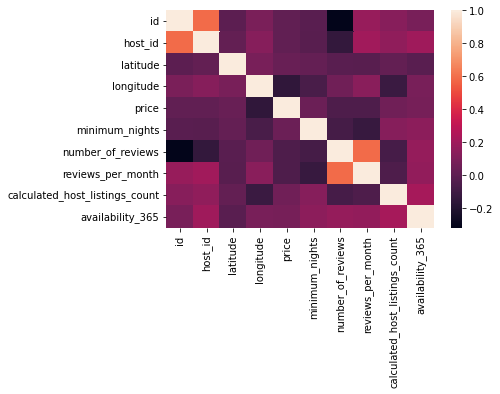

In [440]:
sns.heatmap(df.corr());

In [441]:
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.180221,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.180221,0.209783,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


### Make price binary
We need to turn the price variable from numeric into binary.
Let's create a variable above_average which is 1 if the price is above (or equal to) 152

In [442]:
df['above_avarage']=1*(df.price>=152)

In [479]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,above_avarage
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0


In [445]:
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=1)

In [446]:
len(df_full_train), len(df_test)

(39116, 9779)

In [447]:
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=1)

In [448]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)


In [449]:
y_train=df_train.above_avarage.values
y_val=df_val.above_avarage.values
y_test=df_test.above_avarage.values


In [450]:
del df_train['above_avarage']
del df_val['above_avarage']
del df_test['above_avarage']

In [451]:
df_full_train.above_avarage.value_counts(normalize=True)

0    0.695086
1    0.304914
Name: above_avarage, dtype: float64

In [452]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,above_avarage
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0


## Question 3
- Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
- Which of these two variables has bigger score?
Round it to 2 decimal digits using round(score, 2)

In [453]:
categoric=['neighbourhood_group','room_type']
categoric

['neighbourhood_group', 'room_type']

In [454]:
from sklearn.metrics import mutual_info_score

In [455]:
mutual_score=[]
for c in categoric:
    mutual_score.append(mutual_info_score(df_full_train[c],df_full_train.above_avarage))

my_dict={}
for c in range(len(categoric)):
    my_dict[categoric[c]]=mutual_score[c]

In [456]:
my_dict

{'neighbourhood_group': 0.04628016766358482, 'room_type': 0.14429761662566526}

In [457]:
data={'feature':categoric,'mutual_info_score':mutual_score}
dp=pd.DataFrame.from_dict(data)

In [458]:
mutscore=dp.sort_values(by='mutual_info_score',ascending=False).round(2)
mutscore

,feature,mutual_info_score
1,room_type,0.14
0,neighbourhood_group,0.05


## Question 4
- Now let's train a logistic regression
- Remember that we have two categorical variables in the data. Include them using one-hot encoding.
- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
- model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.

In [459]:
feature=['room_type','neighbourhood_group']

In [460]:
dicts_train_feature=df_train[feature].to_dict(orient='record')
dicts_val_feature=df_val[feature].to_dict(orient='record')

In [461]:
dv_feature = DictVectorizer(sparse=False)
dv_feature.fit(dicts_train_feature)

DictVectorizer(sparse=False)

In [462]:
dv_feature.get_feature_names()

['neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

In [463]:
X_train_feature = dv_feature.transform(dicts_train_feature)

In [464]:
model_feature=LogisticRegression(solver='lbfgs')
model_feature.fit(X_train_feature,y_train)

LogisticRegression()

In [465]:
w0 = model_feature.intercept_[0]
w0

-2.529733846730404

In [466]:
w=model_feature.coef_[0]
w

array([-0.87674518,  0.26882844,  1.38979836, -0.24777304, -0.53168311,
        1.87196806, -0.93218953, -0.93735305])

In [467]:
dict(zip(dv_feature.get_feature_names(),w))

{'neighbourhood_group=Bronx': -0.8767451759169569,
 'neighbourhood_group=Brooklyn': 0.26882843571754184,
 'neighbourhood_group=Manhattan': 1.3897983559193092,
 'neighbourhood_group=Queens': -0.2477730374772844,
 'neighbourhood_group=Staten Island': -0.5316831056812724,
 'room_type=Entire home/apt': 1.8719680591758967,
 'room_type=Private room': -0.9321895326356796,
 'room_type=Shared room': -0.9373530539795529}

In [468]:
numerical= ['latitude',
                    'longitude',
                    'minimum_nights',
                    'number_of_reviews',
                    'reviews_per_month',
                    'calculated_host_listings_count',
                    'availability_365']
categorical=['neighbourhood_group','room_type']
features=numerical+categorical

## Question 5
- We have 9 features: 7 numerical features and 2 categorical.
- Let's find the least useful one using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
neighbourhood_group
room_type
number_of_reviews
reviews_per_month
* note: the difference doesn't have to be positive

In [469]:
def accuracy_score(features):
    dicts_full_train=df_full_train[features].to_dict(orient='record')

    dv = DictVectorizer(sparse=False)
    X_full_train = dv.fit_transform(dicts_full_train)
    y_full_train=df_full_train.above_avarage.values

    model = LogisticRegression(solver='lbfgs')
    model.fit(X_full_train, y_full_train)

    dicts_test = df_test[features].to_dict(orient='records')
    X_test=dv.transform(dicts_test)

    y_pred = model.predict_proba(X_test)[:, 1]

    price_decission=(y_pred>=0.5)
    accuracy=(price_decission==y_test).mean()
    return(round(accuracy,5))

original_acc=accuracy_score(features)
original_acc

C:\Users\luthf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7875

In [470]:
feature=numerical+categorical
acc_score=[]

for f in features:
    feature_copy=features.copy()
    feature_copy.remove(f)
    acc_now=accuracy_score(feature_copy)
    acc_score.append(acc_now)

C:\Users\luthf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\luthf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [471]:
my_dict={}
for f in range(len(features)):
    my_dict[features[f]]=acc_score[f]
    
data={'remove_from_features':feature,'accuracy score':acc_score}
dp=pd.DataFrame.from_dict(data)
dp

,remove_from_features,accuracy score
0,latitude,0.78709
1,longitude,0.78740
2,minimum_nights,0.78597
3,number_of_reviews,0.78709
4,reviews_per_month,0.78781
5,calculated_host_listings_count,0.78679
6,availability_365,0.78198
7,neighbourhood_group,0.74670
8,room_type,0.71786


## Question 6
- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'price'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
If there are multiple options, select the smallest alpha.

In [474]:
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=1)

df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

y_train=df_train.price.values
y_val=df_val.price.values
y_test=df_test.price.values

y_train_log=np.log1p(y_train)
y_val_log=np.log1p(y_val)
y_test_log=np.log1p(y_test)


del df_train['price']
del df_val['price']
del df_test['price']

In [475]:
dv=DictVectorizer(sparse=False)

train_dict=df_train[features].to_dict(orient='records')
X_train=dv.fit_transform(train_dict)

val_dict=df_val[feature].to_dict(orient='records')
X_val=dv.transform(val_dict)

alpha=[0,0.01,0.1,1,10]
rmse_list=[]

for a in alpha:
    model=Ridge(alpha=a)
    model.fit(X_train,y_train_log)
    
    y_pred=model.predict(X_val)
    rmse=mean_squared_error(y_pred,y_val_log)
    rmse_list.append(rmse)

C:\Users\luthf\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.58045e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [476]:
rmse_list

[0.24412031123439076,
 0.24412056423470824,
 0.24412295245496915,
 0.24415694902102536,
 0.24498109096310566]